In [0]:
# importing modules and libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR


In [0]:
#Reading data into spark dataframe
df = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/data270-group10-mount-data/refined data/final_processed_dataset.csv')

In [0]:
# Reading into pandas dataframe
df1 = df.toPandas()
df1.head()

,_c0,date,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
0,0,2015-06-30,30,3,3,6,2541.0,0.03,33.8,8.1,73.8,9.7,2,0
1,1,2015-03-29,29,1,3,3,1458.0,0.00,22.0,8.8,78.9,9.4,1,0
2,2,2015-11-22,22,1,3,11,1700.0,0.00,22.0,9.3,5.7,9.9,0,0
3,3,2015-09-17,17,5,3,9,2718.0,0.00,18.3,12.2,45.4,9.9,1,0
4,4,2015-12-03,3,5,3,12,2748.0,0.00,22.0,11.7,45.9,9.9,1,0


In [0]:
# Displaying first five rows data
df1.head()

,_c0,date,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
0,0,2015-06-30,30,3,3,6,2541.0,0.03,33.8,8.1,73.8,9.7,2,0
1,1,2015-03-29,29,1,3,3,1458.0,0.00,22.0,8.8,78.9,9.4,1,0
2,2,2015-11-22,22,1,3,11,1700.0,0.00,22.0,9.3,5.7,9.9,0,0
3,3,2015-09-17,17,5,3,9,2718.0,0.00,18.3,12.2,45.4,9.9,1,0
4,4,2015-12-03,3,5,3,12,2748.0,0.00,22.0,11.7,45.9,9.9,1,0


In [0]:
# dropping unwanted columns 
df1.drop('_c0', axis=1, inplace=True)
df1.drop('date', axis=1, inplace=True)

In [0]:
df1.head()

,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
0,30,3,3,6,2541.0,0.03,33.8,8.1,73.8,9.7,2,0
1,29,1,3,3,1458.0,0.00,22.0,8.8,78.9,9.4,1,0
2,22,1,3,11,1700.0,0.00,22.0,9.3,5.7,9.9,0,0
3,17,5,3,9,2718.0,0.00,18.3,12.2,45.4,9.9,1,0
4,3,5,3,12,2748.0,0.00,22.0,11.7,45.9,9.9,1,0


In [0]:
# finding correlation 
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
day_of_data,1.0000,0.0163,0.0000,0.0119,-0.0205,-0.0760,0.0549,-0.0974,0.0165,0.0521,0.0198,-0.0233
day_of_week,0.0163,1.0000,0.0000,-0.0086,0.0754,-0.0460,-0.0171,-0.0138,-0.1344,0.0090,-0.0857,-0.0338
direction_of_travel,0.0000,0.0000,1.0000,0.0000,0.7889,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
month_of_data,0.0119,-0.0086,0.0000,1.0000,-0.0729,0.0491,0.1337,0.1003,-0.1081,0.2181,-0.0369,0.0182
traffic_volume,-0.0205,0.0754,0.7889,-0.0729,1.0000,-0.0245,-0.0380,0.0275,0.0217,-0.0349,-0.0059,-0.1407
precip,-0.0760,-0.0460,0.0000,0.0491,-0.0245,1.0000,0.1624,0.2371,0.1879,-0.1122,0.2933,-0.0302
windgust,0.0549,-0.0171,0.0000,0.1337,-0.0380,0.1624,1.0000,0.2462,0.0041,-0.0876,0.1459,0.0247
windspeed,-0.0974,-0.0138,0.0000,0.1003,0.0275,0.2371,0.2462,1.0000,0.0323,0.1078,0.1066,0.0108
cloudcover,0.0165,-0.1344,0.0000,-0.1081,0.0217,0.1879,0.0041,0.0323,1.0000,-0.1809,0.6442,-0.0212
visibility,0.0521,0.0090,0.0000,0.2181,-0.0349,-0.1122,-0.0876,0.1078,-0.1809,1.0000,-0.1515,-0.0062


In [0]:
# machine learning model development
from sklearn.model_selection import train_test_split

X = df1.drop('traffic_volume', axis=1)
y = df1['traffic_volume']

# splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=44)

In [0]:
from sklearn.svm import SVR

model = SVR(kernel='linear',C= 2.7,epsilon= .0348,shrinking=False,cache_size = 8000)
model.fit(X_train, y_train)


Out[80]: SVR(C=2.7, cache_size=8000, epsilon=0.0348, kernel='linear', shrinking=False)

In [0]:
model.coef_

Out[81]: array([[-1.13259027e+00,  4.23626802e-01,  5.96083307e+02,
        -2.11598546e+01, -3.24000000e+00, -6.47965888e+00,
         2.15376925e+01,  6.20001573e-01,  4.66142444e+00,
         2.42570201e+01, -2.63590887e+01]])

In [0]:
y_predict = model.predict(X_test)

Populating the interactive namespace from numpy and matplotlib


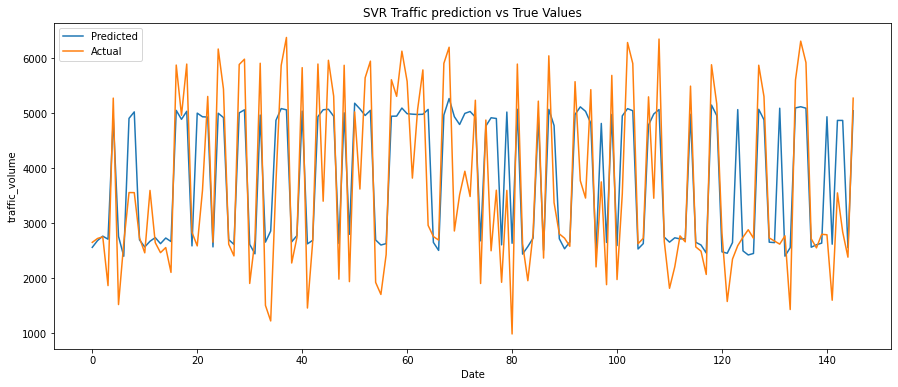

In [0]:
# plotting the actual vs predicted values

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('traffic_volume')
plt.xlabel('Date')
plt.title('SVR Traffic prediction vs True Values')
plt.legend()
plt.show()

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error , mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

MSE_rf  = mean_squared_error(y_test,y_predict)
MAE_rf  = mean_absolute_error(y_test,y_predict)
RMSLE_rf = mean_squared_log_error(y_test, y_predict)
MAPE_rf = mean_absolute_percentage_error(y_test, y_predict)



In [0]:

from sklearn import metrics
print('The R^2 value for Support Vector Regressor is       :', round((r2_score(y_test,y_predict)), 3))
print('The Adjusted R2 value for Support Vector Regressor is :', round((1 - (1-r2_score(y_test,y_predict))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The MSE value for Support Vector Regressor is :', round(MSE_rf));
print('The MAE value for Support Vector Regressor is :', round(MAE_rf));
print('The RMSE value for Support Vector Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSLE value for Support Vector Regressor is        :', RMSLE_rf);
print('The MAPE value for Support Vector Regressor is        :', MAPE_rf);

The R^2 value for Support Vector Regressor is       : 0.635
The Adjusted R2 value for Support Vector Regressor is : 0.629
The MSE value for Support Vector Regressor is : 877767
The MAE value for Support Vector Regressor is : 727
The RMSE value for Support Vector Regressor is : 937
The RMSLE value for Support Vector Regressor is        : 0.07691906838476764
The MAPE value for Support Vector Regressor is        : 0.243315746981047
